In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical

import sys
  
sys.path.insert(0, '../')

from ipynb.fs.full.utils import prune_feature_map, prune_layer_feature_maps, evaluate_layers_sensitivity, save_weights

2022-03-16 16:49:13.992747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-16 16:49:13.992772: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Ejemplo de pruneo de CNN

In [2]:
def load_dataset():
    # load dataset
    (trainX, trainY), (validX, validY) = mnist.load_data()
    
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    validX = validX.reshape((validX.shape[0], 28, 28, 1))
    
    trainX = trainX / 255
    validX = validX / 255
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    validY = to_categorical(validY)
    return trainX, trainY, validX, validY

x_train, y_train, x_valid, y_valid = load_dataset()

In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

2022-03-16 16:49:25.025983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-16 16:49:25.026030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-16 16:49:25.026066: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (paula-Inspiron-3459): /proc/driver/nvidia/version does not exist
2022-03-16 16:49:25.026439: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

2022-03-16 16:49:31.911390: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
   9/1875 [..............................] - ETA: 40s - loss: 2.0590 - accuracy: 0.2778

2022-03-16 16:49:32.859201: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15155200 exceeds 10% of free system memory.
2022-03-16 16:49:32.859277: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15155200 exceeds 10% of free system memory.
2022-03-16 16:49:32.870439: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13478400 exceeds 10% of free system memory.
2022-03-16 16:49:32.885496: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15155200 exceeds 10% of free system memory.


1875/1875 [==============================] - 37s 19ms/step - loss: 0.1127 - accuracy: 0.9649 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0289 - accuracy: 0.9922 - val_loss: 0.0262 - val_accuracy: 0.9925
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0281 - val_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.0321 - val_accuracy: 0.9925


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

# CNN Prunning 

In [7]:
import numpy as np

## Test prunning code

In [13]:
model_prunned = prune_feature_map(model,2,1)

In [11]:
model_prunned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 63)          50463     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 63)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1008)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9930


[0.027147019281983376, 0.9929999709129333]

In [14]:
model_prunned.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_prunned.evaluate(x_valid, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0343 - accuracy: 0.9919


[0.03429808467626572, 0.9919000267982483]

In [10]:
model.save_weights("prunned_kaggle_mnist.h5")

## Test CNN Prunning on MNIST

In [14]:
import matplotlib.pyplot as plt

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
loss_valid, acc_valid = model.evaluate(x_valid, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9930


## Evaluate layer sensitivity

layer: 0
remove: 1
313/313 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.9921
remove: 4
313/313 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 0.9917
remove: 7
313/313 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9906
remove: 10
313/313 [==============================] - 2s 5ms/step - loss: 0.0404 - accuracy: 0.9870
remove: 13
313/313 [==============================] - 2s 4ms/step - loss: 0.0470 - accuracy: 0.9853
remove: 16
313/313 [==============================] - 1s 4ms/step - loss: 0.0597 - accuracy: 0.9817
remove: 19
313/313 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9705
remove: 22
313/313 [==============================] - 1s 4ms/step - loss: 0.1966 - accuracy: 0.9460
remove: 25
313/313 [==============================] - 2s 6ms/step - loss: 0.4028 - accuracy: 0.8808
remove: 28
313/313 [==============================] - 2s 6ms/step - loss: 0.8532 - accuracy: 0

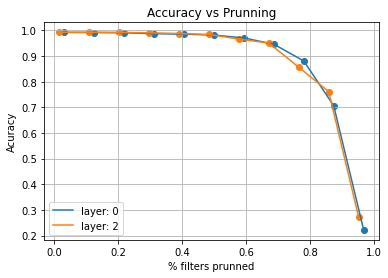

In [17]:
evaluate_layers_sensitivity(model, x_valid, y_valid)

## Prune MNIST CNN

In [18]:
# Prune first layer
model_prunned = prune_layer_feature_maps(model, 0, 19)
model_prunned.compile(loss = "categorical_crossentropy", metrics = ["accuracy"])
_, _ = model_prunned.evaluate(x_valid,  y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.1028 - accuracy: 0.9705


In [19]:
# retrain
_ = model_prunned.fit(x_train, y_train, epochs=1, verbose=1, validation_data=(x_valid, y_valid))

2022-03-11 13:29:23.073525: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0276 - val_accuracy: 0.9916


In [20]:
# Prune second layer
model_prunned = prune_layer_feature_maps(model_prunned, 2, 43)
model_prunned.compile(loss = "categorical_crossentropy", metrics = ["accuracy"])
_, _ = model_prunned.evaluate(x_valid,  y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.9600


In [21]:
# retrain
_ = model_prunned.fit(x_train, y_train, epochs=3, verbose=1, validation_data=(x_valid, y_valid))

2022-03-11 13:29:51.303858: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 3/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0340 - val_accuracy: 0.9901


In [22]:
model_prunned.summary()

Model: "sequential_580"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_732 (Conv2D)         (None, 24, 24, 13)        338       
                                                                 
 max_pooling2d_732 (MaxPooli  (None, 12, 12, 13)       0         
 ng2D)                                                           
                                                                 
 conv2d_776 (Conv2D)         (None, 8, 8, 21)          6846      
                                                                 
 max_pooling2d_776 (MaxPooli  (None, 4, 4, 21)         0         
 ng2D)                                                           
                                                                 
 flatten_580 (Flatten)       (None, 336)               0         
                                                                 
 dense_1160 (Dense)          (None, 128)            

In [23]:
model_prunned.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9901


[0.033956773579120636, 0.9901000261306763]

In [24]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9930


[0.027147019281983376, 0.9929999709129333]

In [25]:
save_weights("prunned_kaggle_model.orga", model_prunned)

# time measurement

In [19]:
from hwcounter import Timer
with Timer() as t:
    from time import perf_counter
    start = perf_counter()
    import tensorflow as tf
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer
    from tensorflow.keras.datasets import mnist
    from keras.utils.np_utils import to_categorical
    def load_dataset():
        # load dataset
        (trainX, trainY), (validX, validY) = mnist.load_data()
        # reshape dataset to have a single channel
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        validX = validX.reshape((validX.shape[0], 28, 28, 1))
        trainX = trainX / 255
        validX = validX / 255
        # one hot encode target value
        trainY = to_categorical(trainY)
        validY = to_categorical(validY)
        return trainX, trainY, validX, validY
    x_train, y_train, x_valid, y_valid = load_dataset()
    model_prunned.predict(x_valid)
    end = perf_counter()
    print("time:", end)
print("cycles:",  t.cycles)

time: 24062.798270959
cycles: 5313288752
